In [1]:
library(CellChat)
library(Seurat)
library(patchwork)
library(ggplot2)
options(stringsAsFactors = FALSE)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

Attaching SeuratObject



In [2]:
future::plan("multiprocess", workers = 4)

Warning message:
“Strategy 'multiprocess' is deprecated in future (>= 1.20.0) [2020-10-30]. Instead, explicitly specify either 'multisession' (recommended) or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'.”


In [3]:
load('./refined_results/integrated_raw_normlized_data_20221210.RData')

In [4]:
meta = integrated@meta.data

In [5]:
table(meta$condition)


control     sap 
  38064   47711 

In [6]:
meta_c <- meta[which(meta$condition=='control'),]
meta_s <- meta[which(meta$condition=='sap'),]

In [7]:
data.input_c <- data.input[,rownames(meta_c)]
data.input_s <- data.input[,rownames(meta_s)]

In [8]:
cellchat.c <- createCellChat(object = data.input_c, meta = meta_c, group.by = "refined_cluters")
cellchat.s <- createCellChat(object = data.input_s, meta = meta_s, group.by = "refined_cluters")

Create a CellChat object from a data matrix

Set cell identities for the new CellChat object



The cell groups used for CellChat analysis are  B_c01_TCL1A B_c02_CD27 B_c03_TNFRSF1B CD4_T_c01_CCR7 CD4_T_c02_S100A4 CD8_T_c01_GZMH CD8_T_c02_GZMK CD8_T_c03_CCR7 DC_c01_CD1C DC_c02_CLEC9A DC_c03_CLEC4C Mono_c01 Mono_c02_IL1B_CCL3 Mono_c03_HLA-DRA_ISG15 Mono_c04_PPBP Mono_c05_CD16 Neutrophil NK Platelet Treg 


Create a CellChat object from a data matrix

Set cell identities for the new CellChat object



The cell groups used for CellChat analysis are  B_c01_TCL1A B_c02_CD27 B_c03_TNFRSF1B CD4_T_c01_CCR7 CD4_T_c02_S100A4 CD8_T_c01_GZMH CD8_T_c02_GZMK CD8_T_c03_CCR7 DC_c01_CD1C DC_c02_CLEC9A DC_c03_CLEC4C Mono_c01 Mono_c02_IL1B_CCL3 Mono_c03_HLA-DRA_ISG15 Mono_c04_PPBP Mono_c05_CD16 Neutrophil NK Platelet Treg 


In [9]:
run_cellchat <- function(cellchat,metadata){
    cellchat <- addMeta(cellchat, meta = metadata)
    cellchat <- setIdent(cellchat, ident.use = "refined_cluters") # set "labels" as default cell identity
    CellChatDB <- CellChatDB.human
    CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling")
    cellchat@DB <- CellChatDB.use
    cellchat <- subsetData(cellchat)
    cellchat <- identifyOverExpressedGenes(cellchat)
    cellchat <- identifyOverExpressedInteractions(cellchat)
    cellchat <- computeCommunProb(cellchat)
    cellchat <- filterCommunication(cellchat, min.cells = 20)
    cellchat <- computeCommunProbPathway(cellchat)   
    return(cellchat)
}

In [10]:
cellchat.c <- run_cellchat(cellchat.c,meta_c)

R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_s

In [11]:
cellchat.s <- run_cellchat(cellchat.s,meta_s)

R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_s

In [13]:
cellchat.s

An object of class CellChat created from a single dataset 
 14207 genes.
 47711 cells.

In [14]:
cellchat.c <- aggregateNet(cellchat.c)
cellchat.s <- aggregateNet(cellchat.s)

In [15]:
cellchat.c <- netAnalysis_computeCentrality(cellchat.c, slot.name = "netP") 
cellchat.s <- netAnalysis_computeCentrality(cellchat.s, slot.name = "netP") 

R_zmq_msg_send errno: 4 strerror: 被中断的系统调用


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_sapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_sapply-2’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_sapply-3’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


R_zmq_msg_send errno: 4 strerror: 被中断的系统调用
R_zmq_msg_send errno: 4 strerror: 被中断的系统调用


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_sapply-4’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


R_zmq_msg_send errno: 4 strerror: 被中断的系统调用


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_sapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


R_zmq_msg_send errno: 4 strerror: 被中断的系统调用


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_sapply-2’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


R_zmq_msg_send errno: 4 strerror: 被中断的系统调用


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_sapply-3’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


R_zmq_msg_send errno: 4 strerror: 被中断的系统调用


Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_sapply-4’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”


In [16]:
object.list <- list(control = cellchat.c, sap = cellchat.s)
cellchat <- mergeCellChat(object.list, add.names = names(object.list))

Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



In [45]:
gg1 <- netVisual_heatmap(cellchat)

Do heatmap based on a merged object 




In [54]:
help(ggave)

No documentation for ‘ggave’ in specified packages and libraries:
you could try ‘??ggave’

In [61]:
pdf("./cellchat_figures/Differential_number_of_interactions_among_different_cell_populations.pdf") 
gg1
dev.off()

png 
  2

In [47]:
gg2 <- netVisual_heatmap(cellchat, measure = "weight")

Do heatmap based on a merged object 




In [60]:
pdf("./cellchat_figures/interaction_strength_of_interactions_among_different_cell_populations.pdf") 
gg2
dev.off()

png 
  2

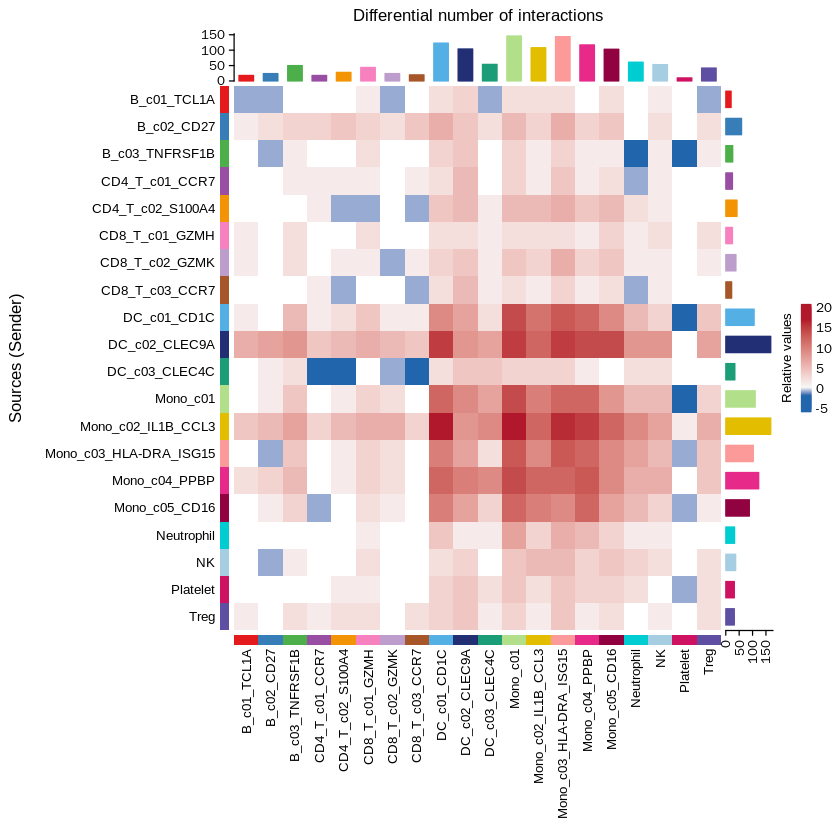

In [52]:
gg1@

Saving 6.67 x 6.67 in image



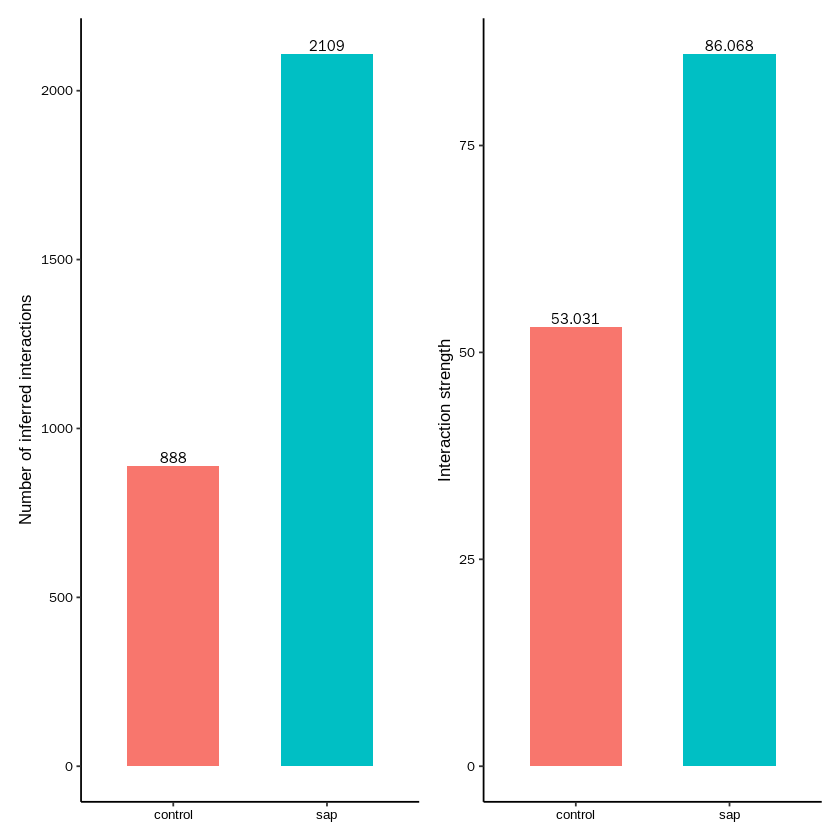

In [19]:
gg1 <- compareInteractions(cellchat, show.legend = F, group = c(1,2))
gg2 <- compareInteractions(cellchat, show.legend = F, group = c(1,2), measure = "weight")
gg1 + gg2
ggsave('./cellchat_figures/number_of_interactions.pdf',dpi=300)

Saving 6.67 x 6.67 in image



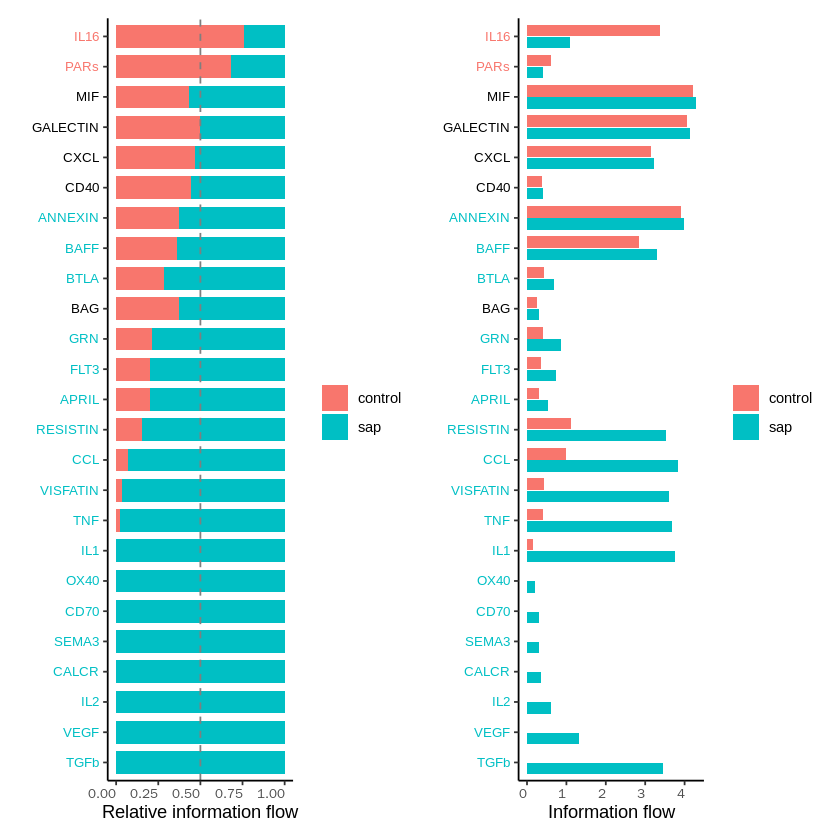

In [36]:
gg1 <- rankNet(cellchat, mode = "comparison", stacked = T, do.stat = TRUE)
gg2 <- rankNet(cellchat, mode = "comparison", stacked = F, do.stat = TRUE)
gg1 + gg2
ggsave('./cellchat_figures/top_signaling_pathways.pdf',dpi=300)

In [50]:
library(ComplexHeatmap)

In [62]:
cellchat <- computeNetSimilarityPairwise(cellchat, type = "functional")

Compute signaling network similarity for datasets 1 2 


Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways

Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways



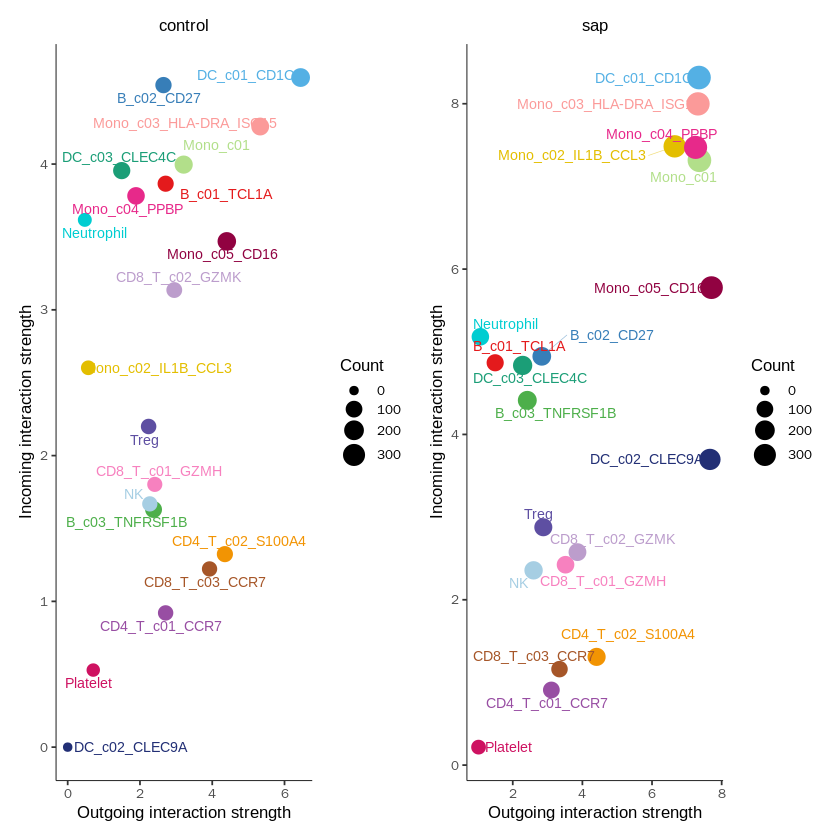

In [71]:
num.link <- sapply(object.list, function(x) {rowSums(x@net$count) + colSums(x@net$count)-diag(x@net$count)})
weight.MinMax <- c(min(num.link), max(num.link)) # control the dot size in the different datasets
gg <- list()
for (i in 1:length(object.list)) {
  gg[[i]] <- netAnalysis_signalingRole_scatter(object.list[[i]], title = names(object.list)[i], weight.MinMax = weight.MinMax)
}
#> Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways
#> Signaling role analysis on the aggregated cell-cell communication network from all signaling pathways
patchwork::wrap_plots(plots = gg)
ggsave('./cellchat_figures/Compare_the_major_sources_and_targets.pdf',dpi=300,width = 12,height = 6)

In [72]:
gg1 <- netAnalysis_signalingChanges_scatter(cellchat, idents.use = "Mono_c02_IL1B_CCL3", signaling.exclude = "MIF")

Visualizing differential outgoing and incoming signaling changes from control to sap

The following `from` values were not present in `x`: -1



Visualizing differential outgoing and incoming signaling changes from control to sap

The following `from` values were not present in `x`: -1

Visualizing differential outgoing and incoming signaling changes from control to sap



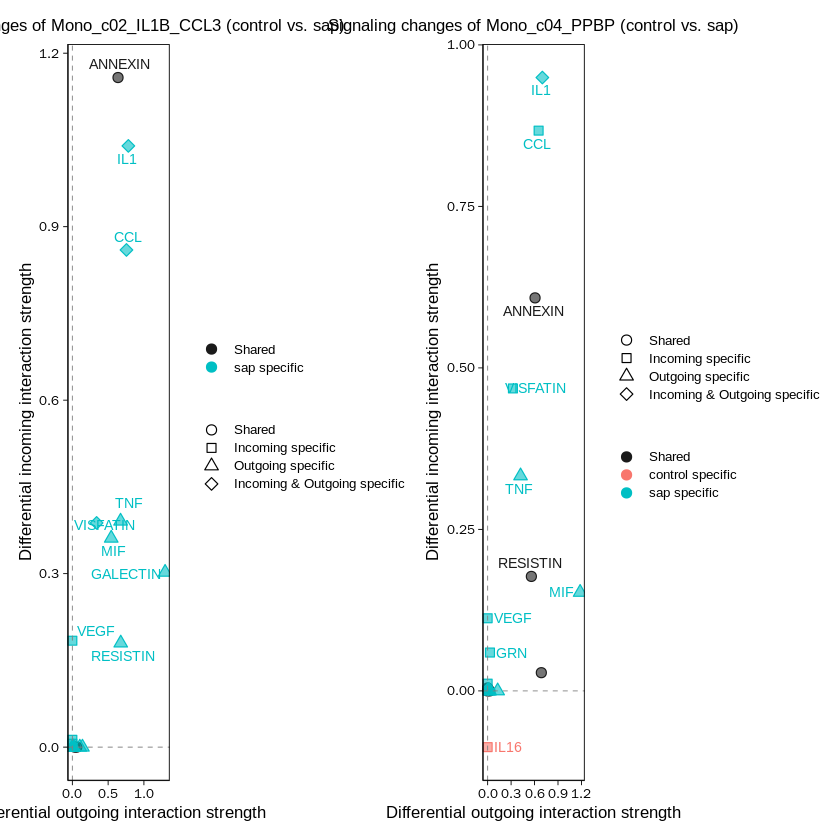

In [76]:
gg1 <- netAnalysis_signalingChanges_scatter(cellchat, idents.use = "Mono_c02_IL1B_CCL3")
#> Visualizing differential outgoing and incoming signaling changes from NL to LS
#> The following `from` values were not present in `x`: 0
#> The following `from` values were not present in `x`: 0, -1
gg2 <- netAnalysis_signalingChanges_scatter(cellchat, idents.use = "Mono_c04_PPBP")
#> Visualizing differential outgoing and incoming signaling changes from NL to LS
#> The following `from` values were not present in `x`: 0, 2
#> The following `from` values were not present in `x`: 0, -1
patchwork::wrap_plots(plots = list(gg1,gg2))
ggsave('./cellchat_figures/Identify_signaling_changes_associated_with_c02andc04_mono.pdf',dpi=300,width = 15,height = 6)

In [81]:
table(cellchat@meta$refined_cluters)


           B_c01_TCL1A             B_c02_CD27         B_c03_TNFRSF1B 
                  2026                   1690                    602 
        CD4_T_c01_CCR7       CD4_T_c02_S100A4         CD8_T_c01_GZMH 
                  7969                   9981                   6360 
        CD8_T_c02_GZMK         CD8_T_c03_CCR7            DC_c01_CD1C 
                  6130                   3891                    708 
         DC_c02_CLEC9A          DC_c03_CLEC4C               Mono_c01 
                    58                    227                  10453 
    Mono_c02_IL1B_CCL3 Mono_c03_HLA-DRA_ISG15          Mono_c04_PPBP 
                 10794                   4361                   1884 
         Mono_c05_CD16             Neutrophil                     NK 
                  3219                    157                  12425 
              Platelet                   Treg 
                  1552                   1288 

In [89]:
levels(cellchat@idents$control)

[1] "B_c01_TCL1A"            "B_c02_CD27"             "B_c03_TNFRSF1B"        
 [4] "CD4_T_c01_CCR7"         "CD4_T_c02_S100A4"       "CD8_T_c01_GZMH"        
 [7] "CD8_T_c02_GZMK"         "CD8_T_c03_CCR7"         "DC_c01_CD1C"           
[10] "DC_c02_CLEC9A"          "DC_c03_CLEC4C"          "Mono_c01"              
[13] "Mono_c02_IL1B_CCL3"     "Mono_c03_HLA-DRA_ISG15" "Mono_c04_PPBP"         
[16] "Mono_c05_CD16"          "Neutrophil"             "NK"                    
[19] "Platelet"               "Treg"

Comparing communications on a merged object 




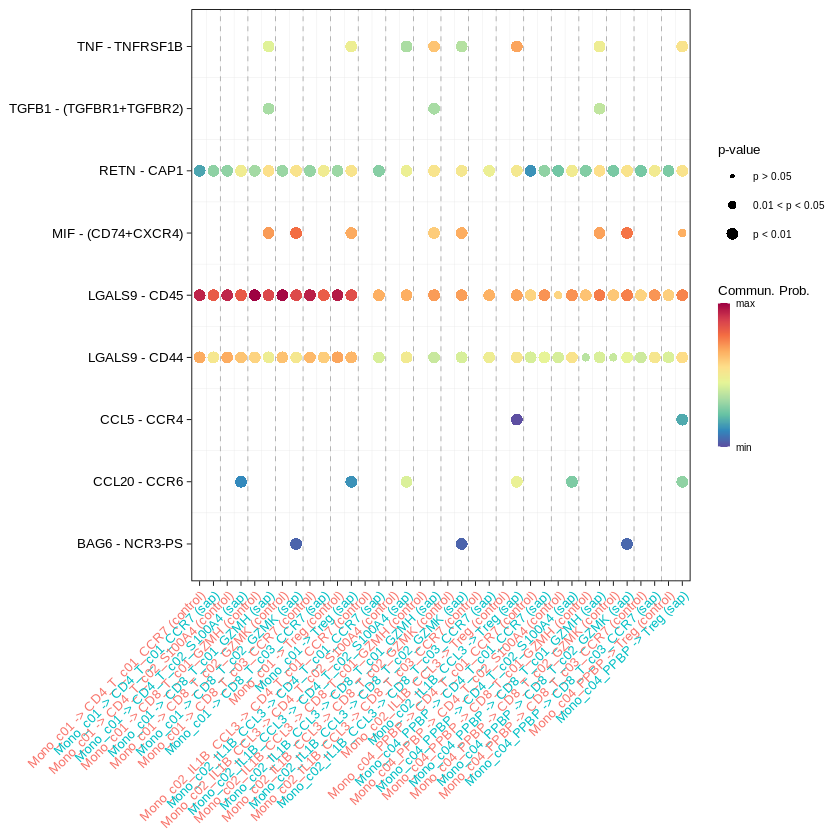

In [95]:
netVisual_bubble(cellchat, sources.use = c(12,13,15), targets.use = c(4:8,20),  comparison = c(1, 2), angle.x = 45)
#ggsave('./cellchat_figures/netVisual_bubble_allcelltypes.pdf',dpi=300,width = 20,height = 20)

In [118]:
# define a positive dataset, i.e., the dataset with positive fold change against the other dataset
pos.dataset = "sap"
# define a char name used for storing the results of differential expression analysis
features.name = pos.dataset
# perform differential expression analysis
cellchat <- identifyOverExpressedGenes(cellchat, group.dataset = "datasets", pos.dataset = pos.dataset,features.name = features.name, only.pos = FALSE, thresh.pc = 0.1, thresh.fc = 0.1, thresh.p = 1)
#> Use the joint cell labels from the merged CellChat object
# map the results of differential expression analysis onto the inferred cell-cell communications to easily manage/subset the ligand-receptor pairs of interest
net <- netMappingDEG(cellchat, features.name = features.name)
# extract the ligand-receptor pairs with upregulated ligands in LS
net.up <- subsetCommunication(cellchat, net = net, datasets = "sap",ligand.logFC = 0.2, receptor.logFC = NULL)
# extract the ligand-receptor pairs with upregulated ligands and upregulated recetptors in NL, i.e.,downregulated in LS
net.down <- subsetCommunication(cellchat, net = net, datasets = "control",ligand.logFC = -0.2, receptor.logFC = -0.2)

Use the joint cell labels from the merged CellChat object



In [119]:
gene.down

[1] "MIF"    "IL16"   "CD40LG" "GZMA"   "ANXA1"  "LGALS9" "BAG6"   "CD4"   
 [9] "F2R"    "FPR1"   "PTPRC"  "NCR3"   "CD44"   "CD74"   "ITGAM"  "CXCR4" 
[17] "ITGB2"

In [120]:
gene.up

[1] "TGFB1"    "VEGFB"    "CCL3"     "CCL3L1"   "CCL20"    "CXCL8"   
 [7] "PPBP"     "PF4V1"    "PF4"      "MIF"      "IL7"      "IL1B"    
[13] "TNF"      "CD70"     "RETN"     "NAMPT"    "SEMA3C"   "ADM"     
[19] "ANXA1"    "BAG6"     "FLT1"     "CCR1"     "CCR6"     "CXCR1"   
[25] "CXCR2"    "CXCR3"    "IL1R2"    "TNFRSF1A" "TNFRSF1B" "CD27"    
[31] "TLR4"     "CAP1"     "INSR"     "PLXND1"   "CALCRL"   "FPR2"    
[37] "FPR1"     "NCR3"     "TGFBR1"   "ACVR1B"   "CD74"     "IL7R"    
[43] "ITGA5"    "NRP1"     "TGFBR2"   "CXCR4"    "CD44"     "IL2RG"   
[49] "ITGB1"    "PLXNA4"

In [115]:
gene.up <- extractGeneSubsetFromPair(net.up, cellchat)
gene.down <- extractGeneSubsetFromPair(net.down, cellchat)

In [121]:
levels(cellchat@idents$control)

[1] "B_c01_TCL1A"            "B_c02_CD27"             "B_c03_TNFRSF1B"        
 [4] "CD4_T_c01_CCR7"         "CD4_T_c02_S100A4"       "CD8_T_c01_GZMH"        
 [7] "CD8_T_c02_GZMK"         "CD8_T_c03_CCR7"         "DC_c01_CD1C"           
[10] "DC_c02_CLEC9A"          "DC_c03_CLEC4C"          "Mono_c01"              
[13] "Mono_c02_IL1B_CCL3"     "Mono_c03_HLA-DRA_ISG15" "Mono_c04_PPBP"         
[16] "Mono_c05_CD16"          "Neutrophil"             "NK"                    
[19] "Platelet"               "Treg"

In [ ]:
# T c(4:8,20)
# B c(1:3)
# DC c(9:11)
# NK 18

Comparing communications on a merged object 


Comparing communications on a merged object 




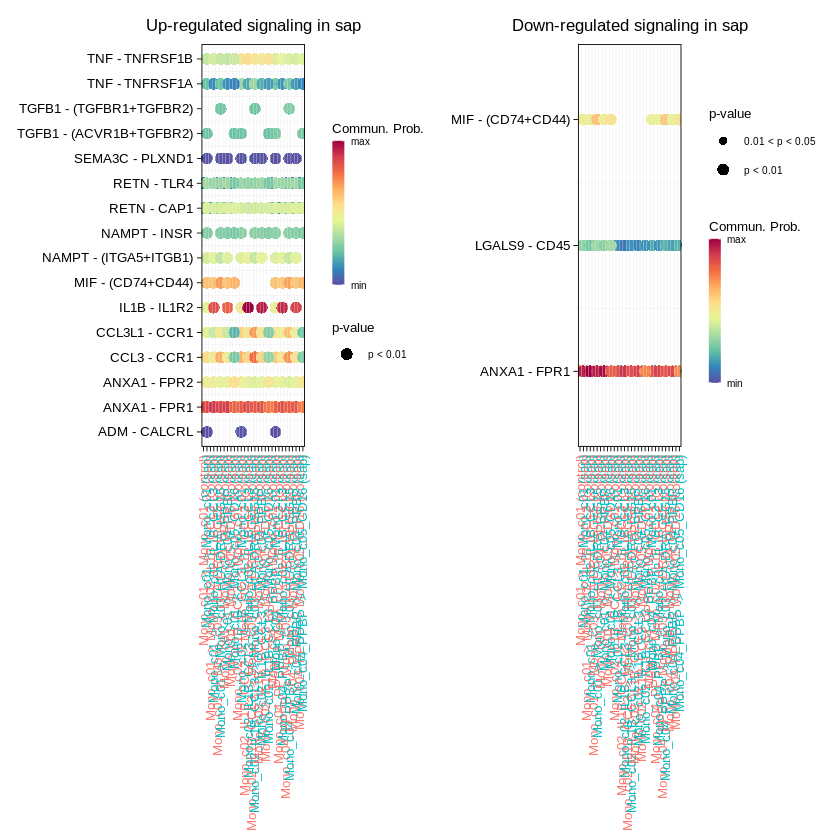

In [124]:
pairLR.use.up = net.up[, "interaction_name", drop = F]
gg1 <- netVisual_bubble(cellchat, pairLR.use = pairLR.use.up, sources.use = c(12,13,15), targets.use = c(12:16), comparison = c(1, 2),  angle.x = 90, remove.isolate = T,title.name = paste0("Up-regulated signaling in ", names(object.list)[2]))
#> Comparing communications on a merged object
pairLR.use.down = net.down[, "interaction_name", drop = F]
gg2 <- netVisual_bubble(cellchat, pairLR.use = pairLR.use.down, sources.use =  c(12,13,15), targets.use = c(12:16), comparison = c(1, 2),  angle.x = 90, remove.isolate = T,title.name = paste0("Down-regulated signaling in ", names(object.list)[2]))
#> Comparing communications on a merged object
gg1 + gg2
ggsave('./cellchat_figures/netVisual_bubble_Mono2Mono.pdf',dpi=300,width = 20,height = 10)

Comparing communications on a merged object 


Comparing communications on a merged object 




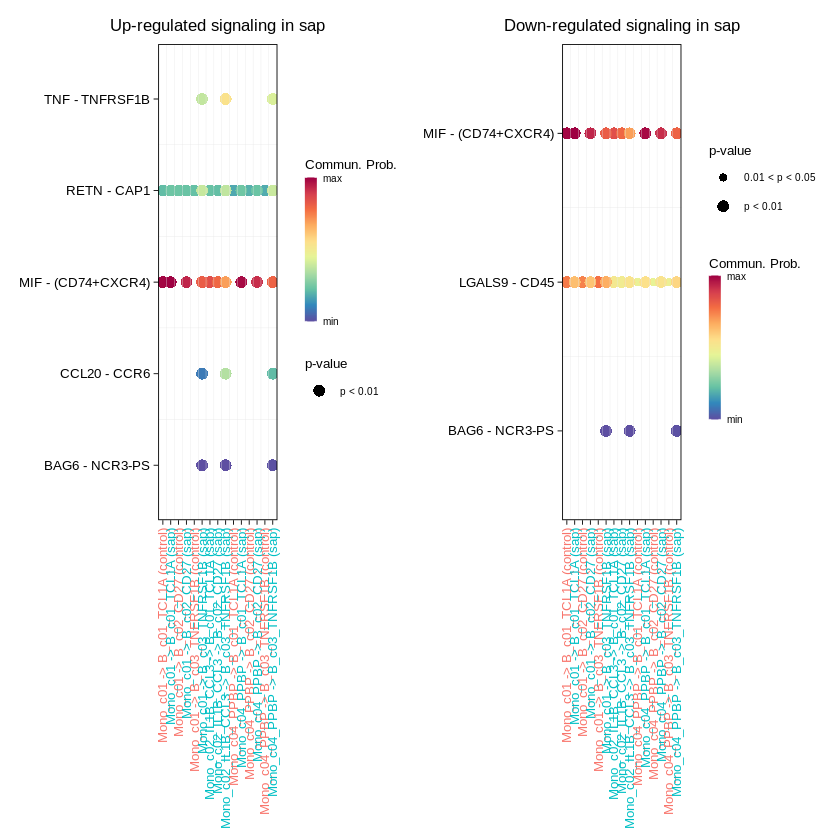

In [125]:
pairLR.use.up = net.up[, "interaction_name", drop = F]
gg1 <- netVisual_bubble(cellchat, pairLR.use = pairLR.use.up, sources.use = c(12,13,15), targets.use =c(1:3), comparison = c(1, 2),  angle.x = 90, remove.isolate = T,title.name = paste0("Up-regulated signaling in ", names(object.list)[2]))
#> Comparing communications on a merged object
pairLR.use.down = net.down[, "interaction_name", drop = F]
gg2 <- netVisual_bubble(cellchat, pairLR.use = pairLR.use.down, sources.use =  c(12,13,15), targets.use =c(1:3), comparison = c(1, 2),  angle.x = 90, remove.isolate = T,title.name = paste0("Down-regulated signaling in ", names(object.list)[2]))
#> Comparing communications on a merged object
gg1 + gg2
ggsave('./cellchat_figures/netVisual_bubble_Mono2B.pdf',dpi=300,width = 20,height = 10)

Comparing communications on a merged object 


Comparing communications on a merged object 




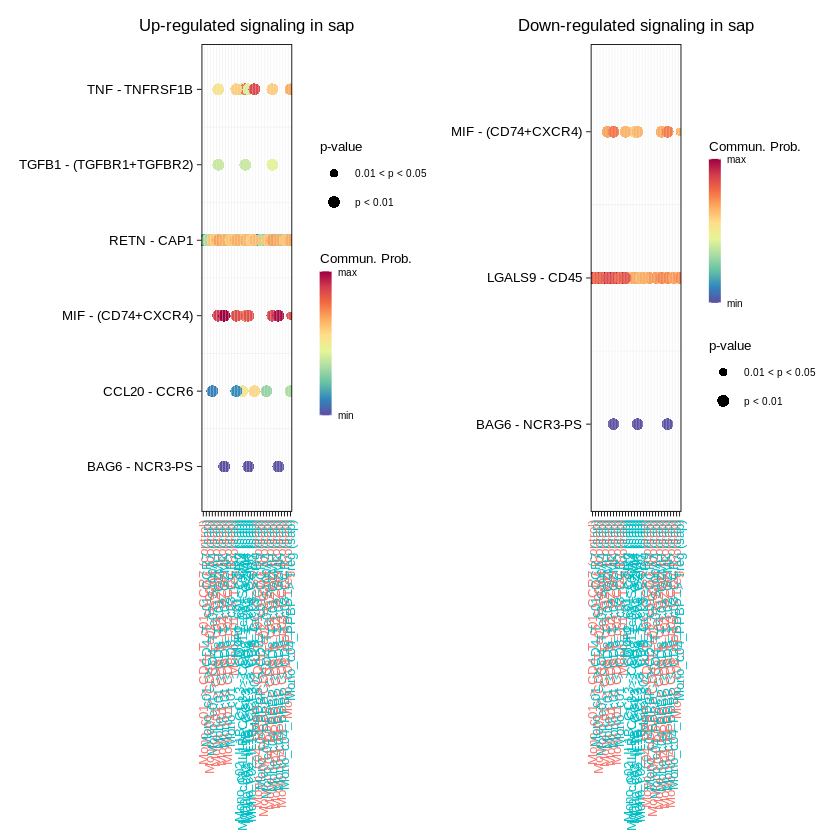

In [128]:
pairLR.use.up = net.up[, "interaction_name", drop = F]
gg1 <- netVisual_bubble(cellchat, pairLR.use = pairLR.use.up, sources.use = c(12,13,15), targets.use =c(4:8,20), comparison = c(1, 2),  angle.x = 90, remove.isolate = T,title.name = paste0("Up-regulated signaling in ", names(object.list)[2]))
#> Comparing communications on a merged object
pairLR.use.down = net.down[, "interaction_name", drop = F]
gg2 <- netVisual_bubble(cellchat, pairLR.use = pairLR.use.down, sources.use =  c(12,13,15), targets.use =c(4:8,20), comparison = c(1, 2),  angle.x = 90, remove.isolate = T,title.name = paste0("Down-regulated signaling in ", names(object.list)[2]))
#> Comparing communications on a merged object
gg1 + gg2
ggsave('./cellchat_figures/netVisual_bubble_Mono2T.pdf',dpi=300,width = 20,height = 10)

Comparing communications on a merged object 


Comparing communications on a merged object 




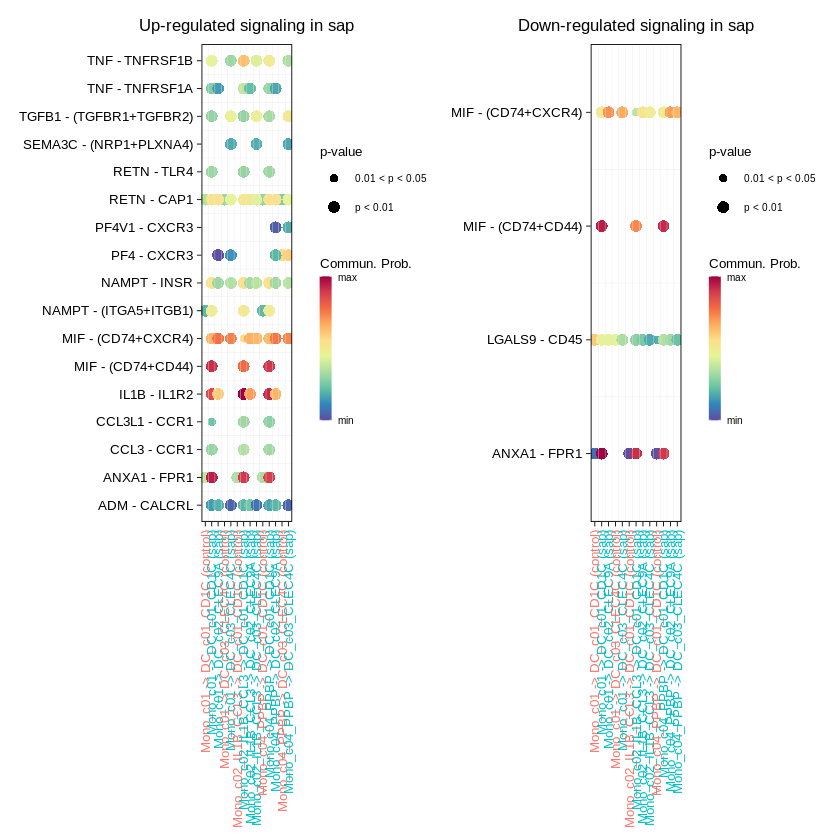

In [126]:
pairLR.use.up = net.up[, "interaction_name", drop = F]
gg1 <- netVisual_bubble(cellchat, pairLR.use = pairLR.use.up, sources.use = c(12,13,15), targets.use =c(9:11), comparison = c(1, 2),  angle.x = 90, remove.isolate = T,title.name = paste0("Up-regulated signaling in ", names(object.list)[2]))
#> Comparing communications on a merged object
pairLR.use.down = net.down[, "interaction_name", drop = F]
gg2 <- netVisual_bubble(cellchat, pairLR.use = pairLR.use.down, sources.use =  c(12,13,15), targets.use =c(9:11), comparison = c(1, 2),  angle.x = 90, remove.isolate = T,title.name = paste0("Down-regulated signaling in ", names(object.list)[2]))
#> Comparing communications on a merged object
gg1 + gg2
ggsave('./cellchat_figures/netVisual_bubble_Mono2DC.pdf',dpi=300,width = 20,height = 10)

Comparing communications on a merged object 


Comparing communications on a merged object 




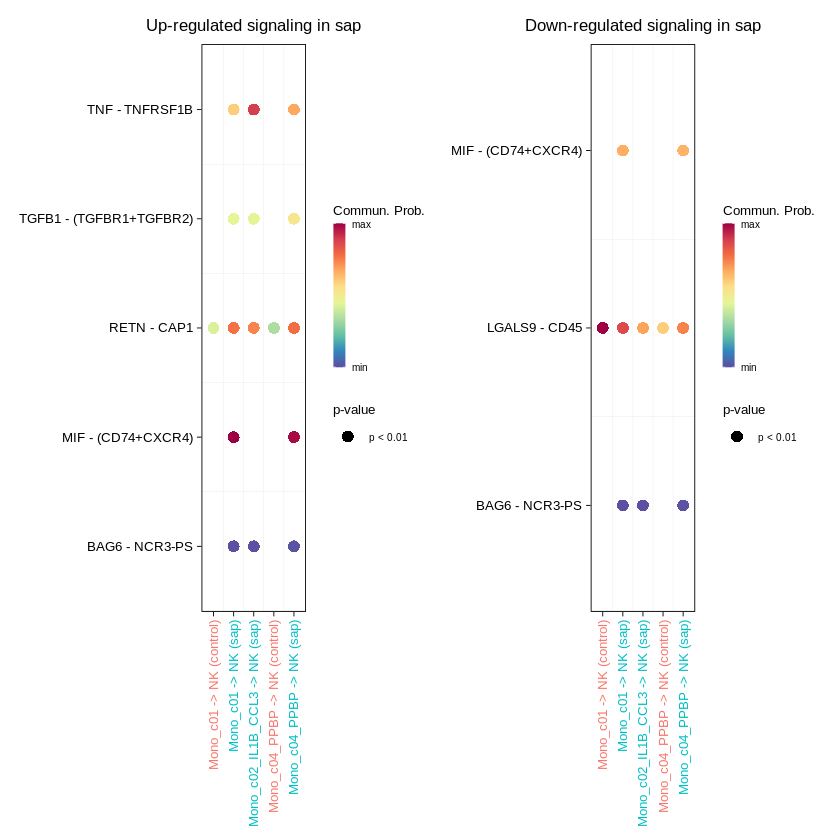

In [127]:
pairLR.use.up = net.up[, "interaction_name", drop = F]
gg1 <- netVisual_bubble(cellchat, pairLR.use = pairLR.use.up, sources.use = c(12,13,15), targets.use =18, comparison = c(1, 2),  angle.x = 90, remove.isolate = T,title.name = paste0("Up-regulated signaling in ", names(object.list)[2]))
#> Comparing communications on a merged object
pairLR.use.down = net.down[, "interaction_name", drop = F]
gg2 <- netVisual_bubble(cellchat, pairLR.use = pairLR.use.down, sources.use =  c(12,13,15), targets.use =18, comparison = c(1, 2),  angle.x = 90, remove.isolate = T,title.name = paste0("Down-regulated signaling in ", names(object.list)[2]))
#> Comparing communications on a merged object
gg1 + gg2
ggsave('./cellchat_figures/netVisual_bubble_Mono2NK.pdf',dpi=300,width = 20,height = 10)

In [129]:
# Chord diagram
par(mfrow = c(1,2), xpd=TRUE)
gg1 = netVisual_chord_gene(object.list[[2]], sources.use = c(12,13,15), targets.use = c(12:16), slot.name = 'net', net = net.up, lab.cex = 0.8, small.gap = 3.5, title.name = paste0("Up-regulated signaling in ", names(object.list)[2]))
gg2 = netVisual_chord_gene(object.list[[1]], sources.use = c(12,13,15), targets.use = c(12:16), slot.name = 'net', net = net.down, lab.cex = 0.8, small.gap = 3.5, title.name = paste0("Down-regulated signaling in ", names(object.list)[2]))
gg1 + gg2 
ggsave('./cellchat_figures/Chord_Mono2Mono.pdf',dpi=300,width = 20,height = 10)

ERROR: Error in netVisual_chord_gene(object.list[[1]], sources.use = c(12, 13, : No signaling links are inferred! 


In [280]:
setdiff(rownames(cellchat@netP$similarity$functional$matrix$`1-2`),rownames(cellchat@netP$similarity$functional$dr$`1-2`))

[1] "GRN--control" "OX40--sap"

In [251]:
final_signal = intersect(intersect(names(cellchat@netP$similarity$functional$group$`1-2`),rownames(cellchat@netP$similarity$functional$matrix$`1-2`)),
         rownames(cellchat@netP$similarity$functional$dr$`1-2`))

In [252]:
cellchat@netP$similarity$functional$matrix$`1-2` = cellchat@netP$similarity$functional$matrix$`1-2`[final_signal,final_signal]
cellchat@netP$similarity$functional$dr$`1-2` = cellchat@netP$similarity$functional$dr$`1-2`[final_signal,]
cellchat@netP$similarity$functional$group$`1-2` = cellchat@netP$similarity$functional$group$`1-2`[final_signal]

In [269]:
cellchat <- computeNetSimilarityPairwise(cellchat, type = "functional")

Compute signaling network similarity for datasets 1 2 


In [270]:
cellchat <- netEmbedding(cellchat, type = "functional",pathway.remove = 'GRN')

Manifold learning of the signaling networks for datasets 1 2 


ERROR: Error in py_call_impl(callable, dots$args, dots$keywords): ValueError: Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.



In [268]:
netVisual_embeddingPairwise(cellchat, type = "functional", label.size = 3.5,pathway.remove = 'GRN')

2D visualization of signaling networks from datasets 1 2 


ERROR: Error in data.frame(x = Y[, 1], y = Y[, 2], Commun.Prob. = prob_sum/max(prob_sum), : arguments imply differing number of rows: 41, 43


In [ ]:
x = 